### This dataset focuses on college students' physical health, mental health, and academic performance, specifically examining how they handle stress during exams or when starting new businesses. It includes information from devices that track students' activities and self-reported details about their lives. Key features consist of demographic information like age and gender, physiological data such as heart rate and blood pressure, and psychological data including self-reported stress levels and emotional states. It also captures academic and entrepreneurial activities, measuring hours spent on studying and business projects, as well as physical activity and sleep quality. The health risk level categorizes students into low, moderate, or high risk, while the family members feature indicates how many family members each student has, highlighting their support system. Overall, this dataset assists researchers in predicting potential health issues in students under stress and provides valuable information for support services to help them.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('student_health_data.csv')
df.head()

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,...,Health_Risk_Level,Family_members,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,...,Moderate,2,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,...,Moderate,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,...,Moderate,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,...,High,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,...,Moderate,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check on the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
 14  Family_me

In [4]:
# check for duplicates
df.duplicated().sum()

0

In [5]:
# check for missing values
df.isna().sum()

Student_ID                     0
Age                            0
Gender                         0
Heart_Rate                     0
Blood_Pressure_Systolic        0
Blood_Pressure_Diastolic       0
Stress_Level_Biosensor         0
Stress_Level_Self_Report       0
Physical_Activity              0
Sleep_Quality                  0
Mood                           0
Study_Hours                    0
Project_Hours                  0
Health_Risk_Level              0
Family_members                 0
Unnamed: 15                 1000
Unnamed: 16                 1000
Unnamed: 17                 1000
Unnamed: 18                 1000
Unnamed: 19                 1000
Unnamed: 20                 1000
Unnamed: 21                  999
Unnamed: 22                  999
dtype: int64

In [10]:
# drop columns wth missing values(columns 15 to 22)
df_clean = df.drop(df.columns[15:23],axis=1)

In [11]:
# check for descriptive statistics
df_clean.describe()

,Student_ID,Age,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Study_Hours,Project_Hours,Family_members
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.9600,70.101863,119.835380,79.854756,5.483909,5.361601,30.227037,14.887368,7.463000
std,288.819436,2.0036,9.544663,14.604307,9.641699,2.596108,2.550382,10.341060,4.888624,4.034465
min,1.000000,18.0000,50.000000,90.000000,60.000000,1.008491,1.002186,5.000000,0.000000,1.000000
25%,250.750000,19.0000,63.347970,109.386868,73.115420,3.270567,3.172409,23.262704,11.573503,4.000000
50%,500.500000,21.0000,70.330916,120.051654,79.651738,5.368891,5.234889,30.432767,14.765873,7.000000
75%,750.250000,23.0000,76.425149,130.397799,86.535640,7.674233,7.471178,37.245193,18.159167,11.000000
max,1000.000000,24.0000,99.650104,165.929204,107.659796,9.994153,9.964115,60.000000,32.720325,14.000000


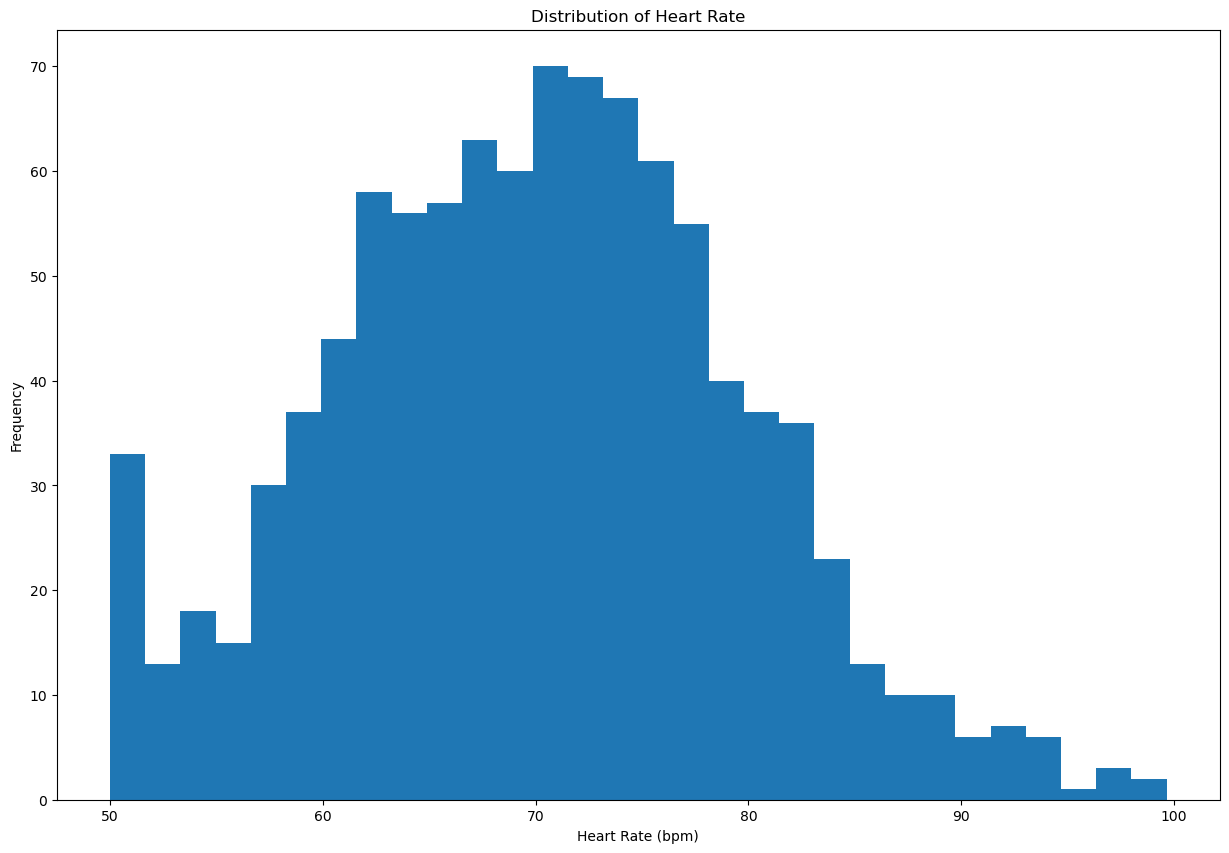

In [14]:
# plot a histogram to show the distribution of heart rate
plt.figure(figsize=(15,10))
plt.hist(df_clean['Heart_Rate'],bins=30)
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Rate')
plt.show();

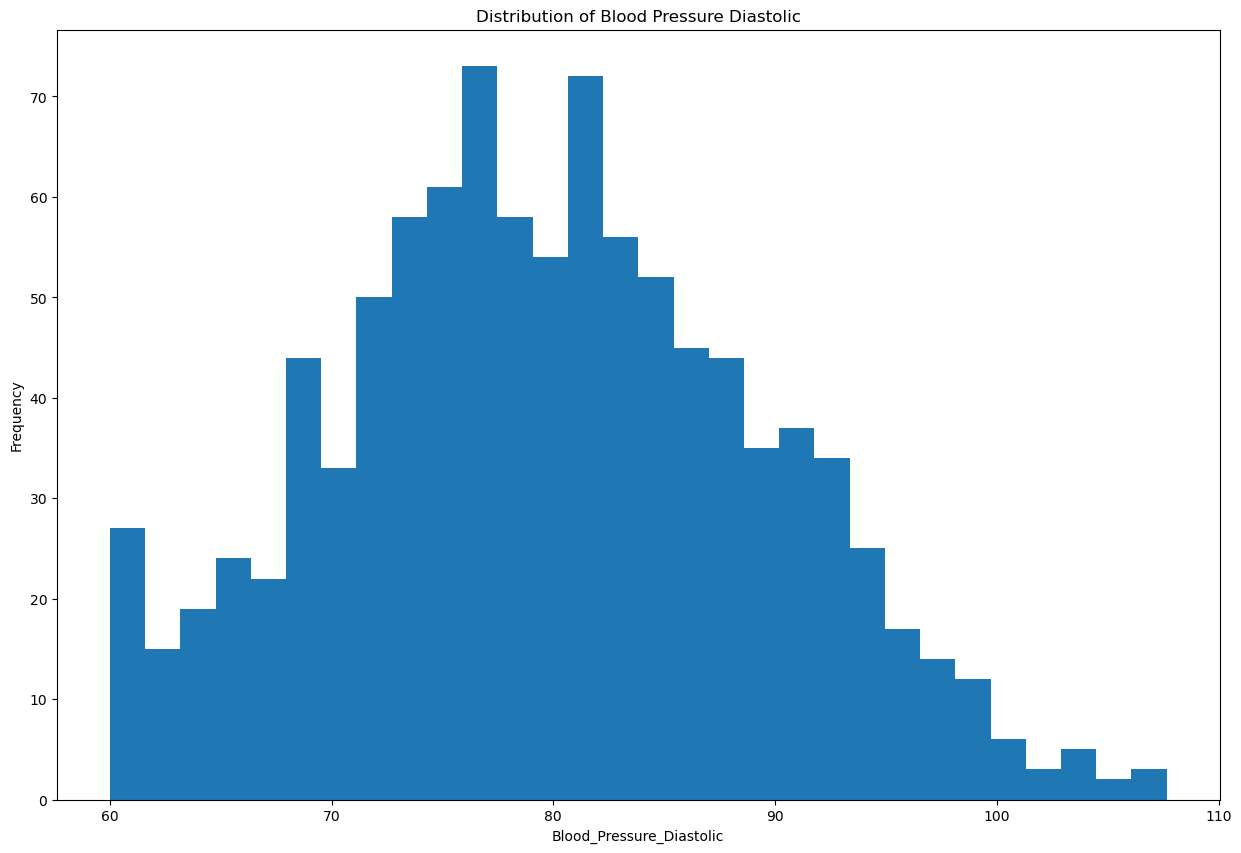

In [ ]:
# plot a histogram to show the distribution of Blood ressure diastolic
plt.figure(figsize=(15,10))
plt.hist(df_clean['Blood_Pressure_Diastolic'],bins=30)
plt.xlabel('Blood_Pressure_Diastolic')
plt.ylabel('Frequency')
plt.title('Distribution of Blood Pressure Diastolic')
plt.show();

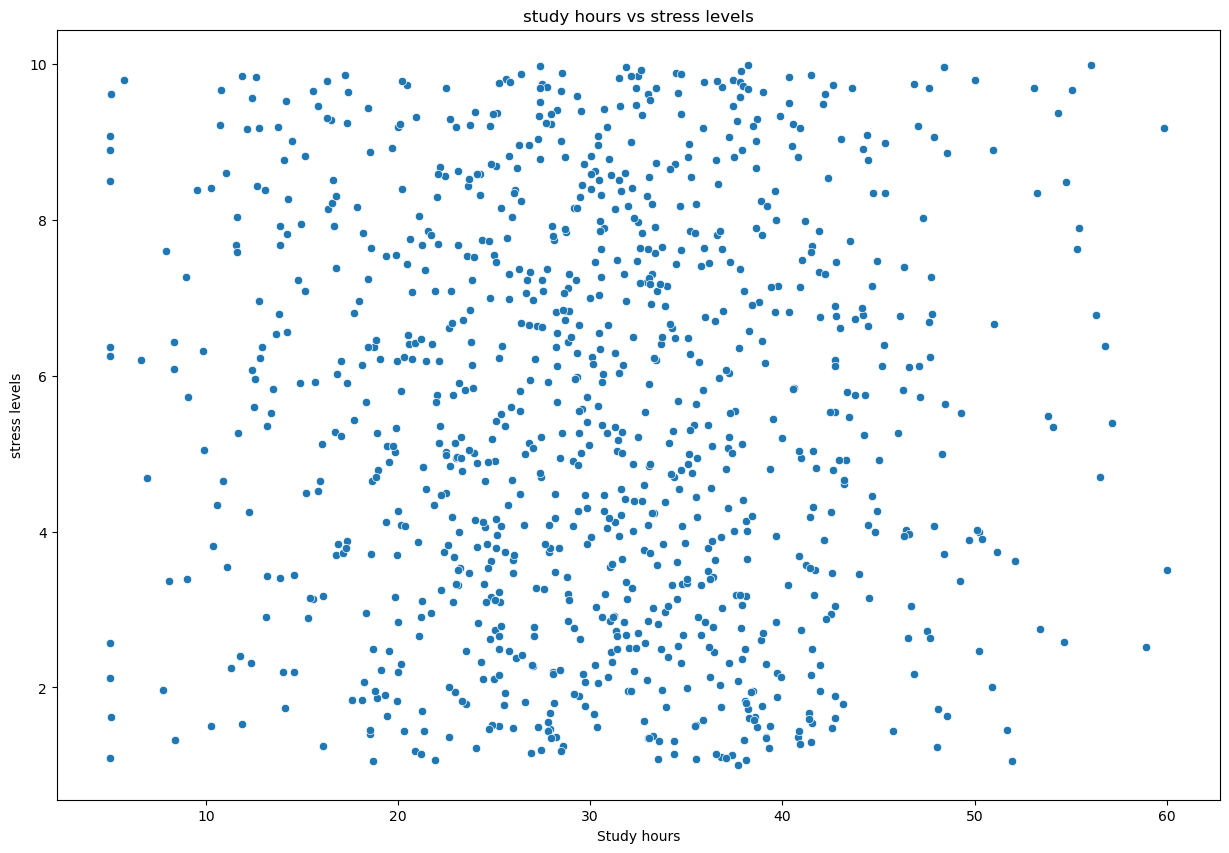

In [19]:
# plot a scatterplot to determine the relationship between study hours and stress levels
plt.figure(figsize=(15,10))
sns.scatterplot(x='Study_Hours',
                y= 'Stress_Level_Biosensor',
                data=df_clean)
plt.title('study hours vs stress levels')
plt.xlabel('Study hours')
plt.ylabel('stress levels')
plt.show();

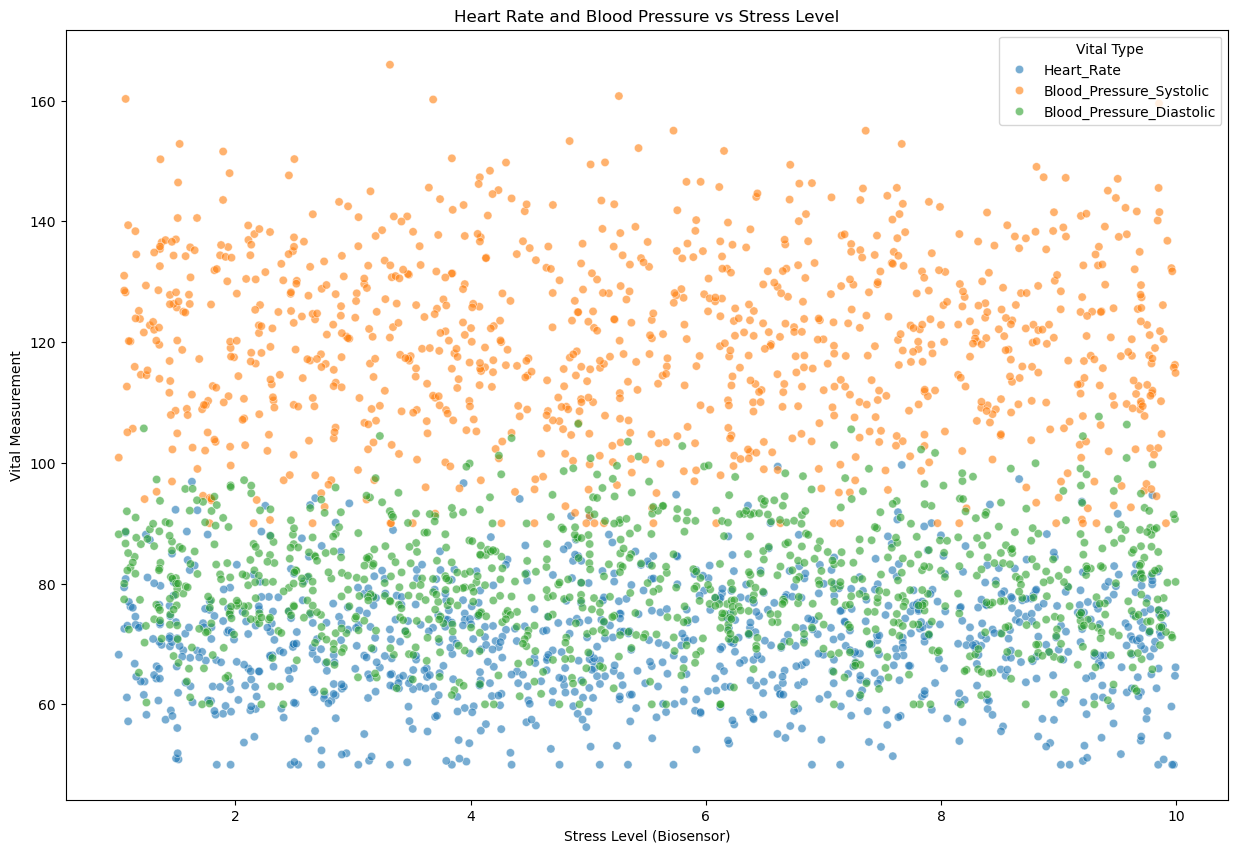

In [24]:
# plot a scatterplot of the three vitals(Heart rate, blood pressure diastolic and systolic) against stress levels
vitals_df = df.melt(
    id_vars='Stress_Level_Biosensor',
    value_vars=[
        'Heart_Rate',
        'Blood_Pressure_Systolic',
        'Blood_Pressure_Diastolic'
    ],
    var_name='Vital_Type',
    value_name='Vital_Value'
)
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=vitals_df,
    x='Stress_Level_Biosensor',
    y='Vital_Value',
    hue='Vital_Type',
    alpha=0.6
)

plt.xlabel('Stress Level (Biosensor)')
plt.ylabel('Vital Measurement')
plt.title('Heart Rate and Blood Pressure vs Stress Level')
plt.legend(title='Vital Type')
plt.show();


This graph tries to explain how the three vitals change in relationship to the increase in stress levels. We can see that as stress level increases, the heart rate increases and also the blood pressures(diastolic and systolic)tend to increase with systolic increasing more. This means that these vitals are affected by stress levels and should always be taken a close look at.

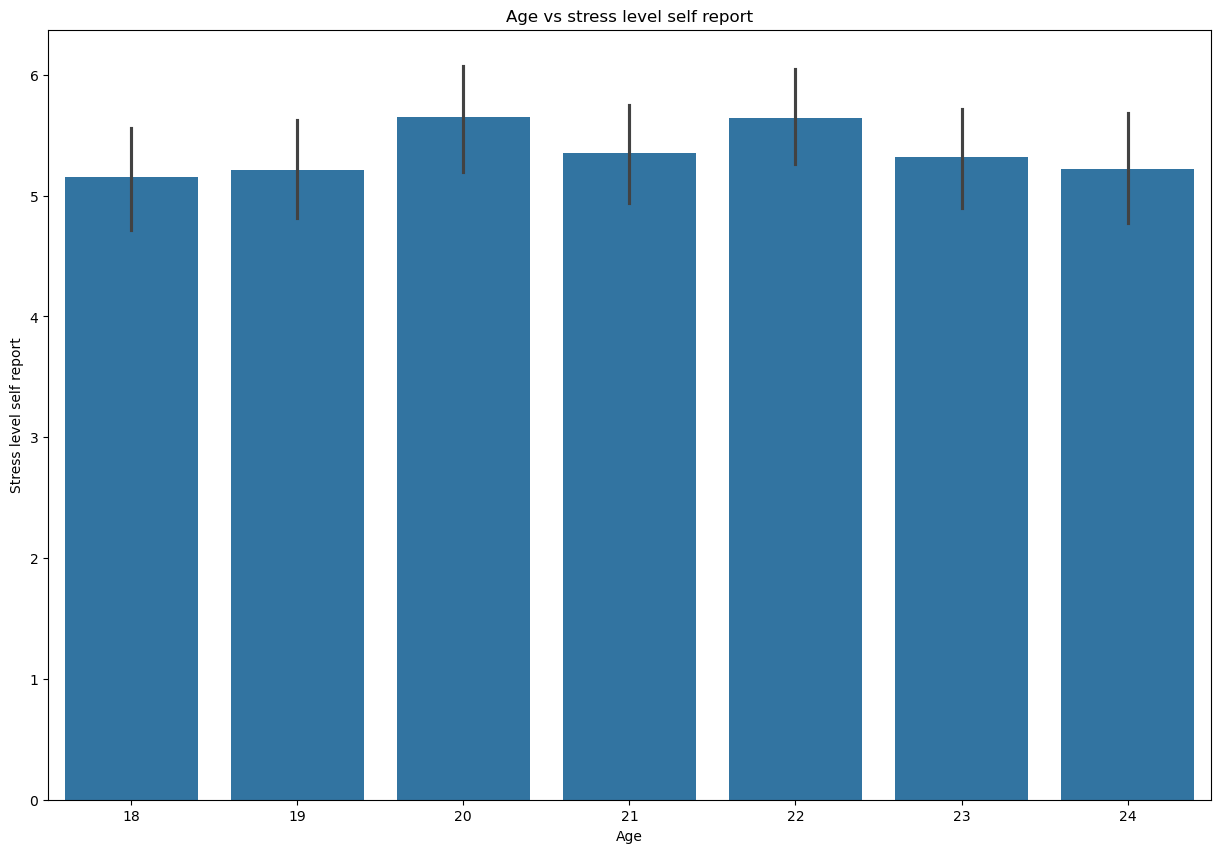

In [29]:
# plot a bar graph of Age vs stress level self report
plt.figure(figsize=(15,10))
sns.barplot(x = df_clean['Age'],
        y= df_clean['Stress_Level_Self_Report'])
plt.title('Age vs stress level self report')
plt.xlabel('Age')
plt.ylabel('Stress level self report')
plt.show();

Individuals of more than 19 years of age are able to report their stress levels more than those of less than 19. It would be really important to get close to teenagers and ask the about their mental health.

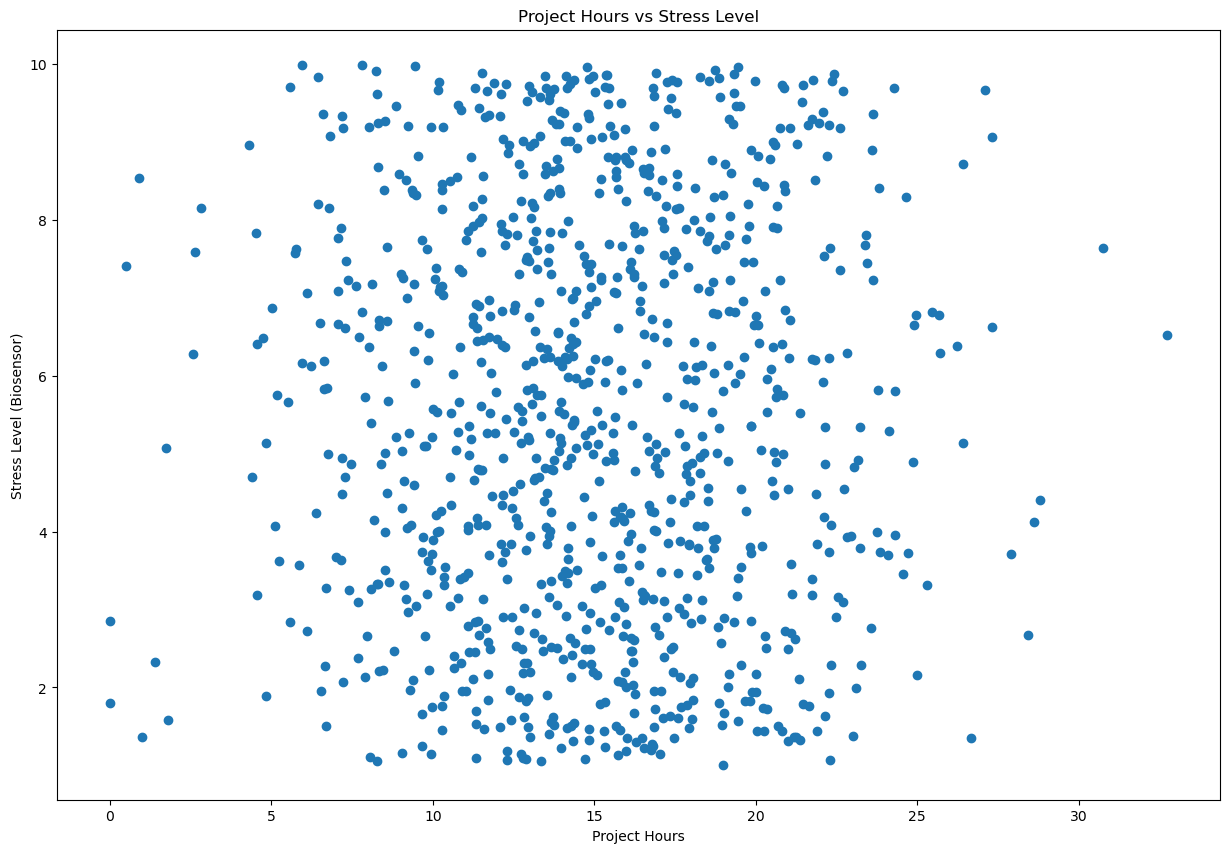

In [ ]:
# plot a scatterplot of Project Hours vs Stress Level
plt.figure(figsize=(15,10))
plt.scatter(df['Project_Hours'], df['Stress_Level_Biosensor'])
plt.xlabel('Project Hours')
plt.ylabel('Stress Level (Biosensor)')
plt.title('Project Hours vs Stress Level')
plt.show();


As the project hours increases the stress levels also increases.

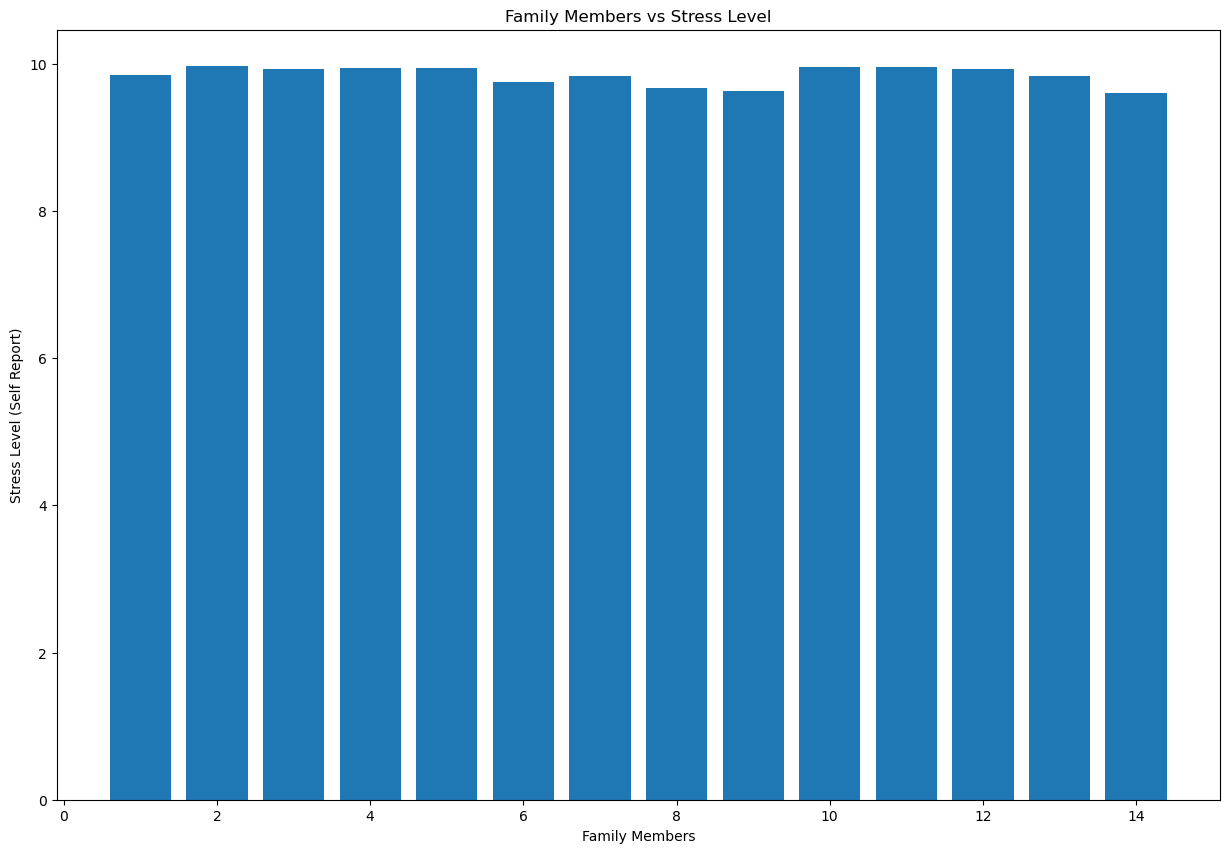

In [47]:
# plot a scatterplot of Family Members vs Stress Level
plt.figure(figsize=(15,10))
plt.bar(df['Family_members'], df['Stress_Level_Self_Report'])
plt.xlabel('Family Members')
plt.ylabel('Stress Level (Self Report)')
plt.title('Family Members vs Stress Level')
plt.show();
